# Data analysis and storytelling

We are being hired by a local library with a problem, their books are being checked out and then
returned late way too often. They would love to understand the cause of the issue and what they can
learn from the data to proactively monitor the situation going forward.

* The library provided 4 CSVs containing data the library managed to collect. Our first step would be to unite these CSVs into a metadata.
After a quick exploration of the data available we noticed that we have about 2000 rows with data about customers, the same for the checkout, while the data for libraries(19 rows) and books(241 rows) is less. 

* Each customer borrowed a certain book and was given a patron_id. Because we have this patron id, and a book id (who borrowed the book) we actually know who borrowed what book. Below I created a query so I can impute the name of the book and its characteristics for the rest of the rows.

In [3]:
import sqlite3
import pandas as pd

# Read the CSV file into a pandas dataframe
checkout = pd.read_csv(r'C:\Users\Sebi-PC\Desktop\Project Python\Project3\Data Steward\checkouts.csv')
customers = pd.read_csv(r'C:\Users\Sebi-PC\Desktop\Project Python\Project3\Data Steward\customers.csv')
books = pd.read_csv(r'C:\Users\Sebi-PC\Desktop\Project Python\Project3\Data Steward\books.csv')
libraries = pd.read_csv(r'C:\Users\Sebi-PC\Desktop\Project Python\Project3\Data Steward\libraries.csv')

# Create a new SQLite database
conn = sqlite3.connect('mydatabase.db')

# Write the dataframe to a table in the database
checkout.to_sql('checkout', conn)
customers.to_sql('customers', conn)
books.to_sql('books', conn)
libraries.to_sql('libraries', conn)

In [5]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()
cursor.execute('SELECT * FROM checkout JOIN customers ON checkout.patron_id = customers.id JOIN books ON checkout.id = books.id JOIN libraries ON checkout.library_id = libraries.id;')
rows = cursor.fetchall()

In [6]:
import csv
column_names = [description[0] for description in cursor.description]
with open('metadata_updated.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(column_names)
    writer.writerows(rows)

In [116]:
import pandas as pd
df =pd.read_csv (r'C:\Users\Sebi-PC\Desktop\Project Python\Project3\Data Steward\metadata_updated.csv')

In [117]:
df.head(5)

,index,patron_id,date_checkout,date_returned,index.1,id,name,street_address,city,state,...,categories,price,pages,index.3,library_id,name.1,street_address.1,city.1,region,postal_code
0,0,b071c9c68228a2b1d00e6f53677e16da,1/28/2019,11/13/2018,586,b071c9c68228a2b1d00e6f53677e16da,Rachelle Miller,73 NE Cook St,Portland,Oregon,...,['Fiction'],144.5,513,12,225-222@5xc-jtz-hkf,MULTNOMAH County Library,216 ne Knott st,NaN,OR,NaN
1,1,8d3f63e1deed89d7ba1bf6a4eb101373,5/29/2018,6/12/2018,1418,8d3f63e1deed89d7ba1bf6a4eb101373,Jeanette Nelms,4942 SE 28th Ave,Portland,Oregon,...,NaN,416.99,752,5,223-222@5xc-jxr-tgk,MULTNOMAH County Library Woodstock,6008 se 49TH AVE,Portland,OR,-97206
2,2,4ae202f8de762591734705e0079d76df,11/23/2018,1/24/2019,705,4ae202f8de762591734705e0079d76df,Melvin Jackson,2821 NE Klickitat St,Portland,Oregon,...,['Advertising'],217,790,11,228-222@5xc-jtz-hwk,Multnomah County Library,205 NE Russell St,NaN,NaN,97212-
3,3,f9372de3c8ea501601aa3fb59ec0f524,1/15/2018,4/25/2018,53,f9372de3c8ea501601aa3fb59ec0f524,James Klein,1720 N Shaver St,Portland,Oregon,...,['Technology & Engineering'],190.5,597,1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,NaN,or,NaN
4,4,2cf3cc3b9e9f6c608767da8d350f77c9,12/31/2018,1804-01-23,1149,2cf3cc3b9e9f6c608767da8d350f77c9,Lani Alvarez,7845 NE Alberta St,Portland,Oregon,...,['Business & Economics'],406.99,774,12,225-222@5xc-jtz-hkf,MULTNOMAH County Library,216 ne Knott st,NaN,OR,NaN


In [118]:
df.tail(5)

,index,patron_id,date_checkout,date_returned,index.1,id,name,street_address,city,state,...,categories,price,pages,index.3,library_id,name.1,street_address.1,city.1,region,postal_code
1995,1995,91871955f3641857832766ac3f5a0b95,7/19/2018,8/12/2018,63,91871955f3641857832766ac3f5a0b95,Brian Ward,35 SE 32nd Ave,Portland,Oregon,...,NaN,302,668,13,222-222@5xc-jv5-nt9,Multnomah County Library North Portland,512 N Killingsworth St,Portland,OR,#97217
1996,1996,ad08956eb20efb746af650f906d439cf,3/7/2018,3/13/2018,314,ad08956eb20efb746af650f906d439cf,Eva Stone,14855 SE Rancho Ave,Portland,Oregon,...,['Science'],506.99,493,4,22d-222@5xc-kcy-8sq,Multnomah County Library Sellwood Moreland,7860 SE 13th AVE,Portland,OR,97202
1997,1997,026262cc3454149303074c4113b5f118,6/17/2018,6/27/2018,263,026262cc3454149303074c4113b5f118,Annie Holland,4436 NE Jarrett St,Portland,Oregon,...,['Industries'],371,751,8,226-222@5xc-jxj-7yv,Multnomah County Library Belmont,1038 SE CESAR E CHAVEZ blvd,Portland,OR,97214
1998,1998,08b29865e58e9b2aabff9684a703acf0,12/10/2018,12/29/2018,1324,08b29865e58e9b2aabff9684a703acf0,Juan Gates,3232 SE 112th Ave,Portland,Oregon,...,['Electric railroads'],484,635,5,223-222@5xc-jxr-tgk,MULTNOMAH County Library Woodstock,6008 se 49TH AVE,Portland,OR,-97206
1999,1999,ac0bb7b22b4df999a0b1216ded727f8e,10/10/2018,11/1/2018,1741,ac0bb7b22b4df999a0b1216ded727f8e,Richard Strole,424 NE Broadway St,Portland,Oregon,...,['Medicine'],267.99,#507,11,228-222@5xc-jtz-hwk,Multnomah County Library,205 NE Russell St,NaN,NaN,97212-


As we can notice, we now have the book characteristics for the rest of the customers.

Now that I united all tables in a metadata I will start the first step in the project: Cleaning the Data.

# Data Cleaning

### Cleaning the socio-economic characteristics of customers

As I have taken a look on the data, I realized that most of the columns have problems such as: Missing data, unusual characters, wrong typed-in data format, brackets etc
In this section I start by cleaning the what I think will be the most relevant columns in my analysis. 
The columns are the following: "date_checkout", "date_returned", "city", "state", "zipcode", "birth_date", "gender", "education", "occupation".

In [119]:
# Change the format for city and state columns
df['city'] = df['city'].str.lower().str.title()
df['state'] = df['state'].str.lower().str.title()

In [120]:
# Convert 'zipcode' column to string data type
df['zipcode'] = df['zipcode'].astype(str)

# Remove any non-digit characters from 'zipcode' column
df['zipcode'] = df['zipcode'].str.replace('\D', '')

# Remove any trailing hyphen in 'zipcode' column
df['zipcode'] = df['zipcode'].str.rstrip('-')


## It seems that after cleaning we have wrong typed zipcodes (it consists of more than 5 digits)
## We create a function to keep only the first 5 digits

import re


# Define a function to clean the postal code
def clean_postal_code(code):
    # Remove all non-digit characters
    code = re.sub(r'\D', '', code)
    # If the code is longer than 5 digits, keep only the first 5
    code = code[:5]
    return code

# Apply the function to the entire column
df['zipcode'] = df['zipcode'].astype(str).apply(clean_postal_code)
df['zipcode'] = df['zipcode'].apply(clean_postal_code)


## To a closer look we discovered that the state column has missing values. At the same time it contains 2 states only:
## either Washington or Oregon. We can inpute the missing values based on the next strategy: if the zipcode starts with
## 97 it is Oregon if it starts with 98 it is Washington.

import pandas as pd

def impute_state(row):
    zipcode = row['zipcode']
    if str(zipcode)[:2] == '98':
        row['state'] = 'Washington'
    elif str(zipcode)[:2] == '97':
        row['state'] = 'Oregon'
    return row

df = df.apply(impute_state, axis=1)

C:\Users\Sebi-PC\AppData\Local\Temp\ipykernel_19632\4219680397.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [121]:
# Clean the occupation, education and gender column by converting all strings to lowercase
df['occupation'] = df['occupation'].str.lower().str.title().str.strip().str.replace(' ', '')
df['education'] = df['education'].str.lower().str.title().str.strip().str.replace(' ', '')
df['gender'] = df['gender'].str.lower().str.title().str.strip().str.replace(' ', '')

In [122]:
# CLEANING the birth_date column and creating a new column named "age" containing the age of the customers.

# Convert birth_date to datetime format
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Filter out any dates that are not in the 20th or 21st century
df = df[(df['birth_date'].dt.year >= 1900) & (df['birth_date'].dt.year < 2100)]

import datetime as dt

# Calculate the age of each person
current_year = dt.datetime.now().year
df['age'] = current_year - df['birth_date'].dt.year

In [123]:
### We clean the following columns "date_checkout" and "date_returned". Some of the date inserted were having the year 1900 or 2100

#Reformating the date 

df['date_checkout'] = pd.to_datetime(df['date_checkout'], errors='coerce').dt.strftime('%Y-%m-%d')
df['date_returned'] = pd.to_datetime(df['date_returned'], errors='coerce').dt.strftime('%Y-%m-%d')

df['date_checkout'] = pd.to_datetime(df['date_checkout'], errors='coerce')
df['date_returned'] = pd.to_datetime(df['date_returned'], errors='coerce')

# Check if the year is less than 1900 and replace it with NaN
df.loc[df['date_checkout'].dt.year < 1900, 'date_checkout'] = pd.NaT
df.loc[df['date_returned'].dt.year < 1900, 'date_returned'] = pd.NaT

# Remove dates that start from 2100 or later
df = df[~(df['date_checkout'].dt.year >= 2100)]
df = df[~(df['date_returned'].dt.year >= 2100)]


I am creating a new column (days_late) where I am calculating the the total amount late days. At the same time I
am creating a second column (late) which marks being late as (over 28 days) as "1" and not being late at all as "0"

In [124]:
# Calculate the number of days each book was late
df['days_late'] = pd.to_datetime(df['date_returned']) - pd.to_datetime(df['date_checkout'])
df['days_late'] = df['days_late'].dt.days

# Set delays of 28 days or less to 0, and delays of more than 28 days to their actual value
df['days_late'] = df['days_late'].apply(lambda x: x if x > 28 else 0)

# We also create a separate column where we mark as "1" if the person was late and "0" if it was not.

df['late'] = df['days_late'].apply(lambda x: 1 if x > 0 else 0)

### Cleaning the books characteristics
In this section I start by cleaning the what I think will be the most relevant columns in my analysis. The columns are the following:"authors", "publisher", "publishedDate", "categories", "price", "pages".


In [125]:
#CLEANING the "authors" column. Specifically we take out the brackets and other unusual characters

import ast
import re

# Replace NaN values with a default value in the categories column
df['authors'].fillna('Unknown', inplace=True)

# Clean the categories column using regular expressions
pattern = r"\b\w+\b"
df['authors'] = df['authors'].apply(lambda x: re.findall(pattern, x) if isinstance(x, str) else [])

# Check if the value is an empty list and replace it with a string containing empty brackets
df['authors'] = df['authors'].apply(lambda x: '[]' if len(x) == 0 else x)

# Clean the categories column
df['authors'] = df['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['authors'] = df['authors'].apply(lambda x: [category.strip() for category in x])

df['authors'] = df['authors'].apply(lambda x: ', '.join(x))

In [126]:
## The same thing for "categories" column.

import ast
import re

# Replace NaN values with a default value in the categories column
df['categories'].fillna('Unknown', inplace=True)

# Clean the categories column using regular expressions
pattern = r"\b\w+\b"
df['categories'] = df['categories'].apply(lambda x: re.findall(pattern, x) if isinstance(x, str) else [])

# Check if the value is an empty list and replace it with a string containing empty brackets
df['categories'] = df['categories'].apply(lambda x: '[]' if len(x) == 0 else x)

# Clean the categories column
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['categories'] = df['categories'].apply(lambda x: [category.strip() for category in x])

df['categories'] = df['categories'].apply(lambda x: ', '.join(x))

In [127]:
## CLEANING and reformatting the "publishedDate"

def clean_publication_dates(column):
    cleaned_dates = []
    for date in column:
        if type(date) == str:
            # check if date is in the format "mm/dd/yyyy"
            if len(date) == 10:
                year = date[-4:]
            # check if date is in the format "yyyy"
            elif len(date) == 4:
                year = date
            # check if date is in another format and try to extract year
            else:
                try:
                    year = re.search(r"\d{4}", date).group()
                except AttributeError:
                    year = None
        else:
            year = None
        cleaned_dates.append(year)
    return cleaned_dates
df['publishedDate'] = clean_publication_dates(df['publishedDate'])

In [128]:
### CLEANING "price" column

import re

# Define a function to clean the price column
def clean_price(price):
    # Remove non-numeric characters and convert to float
    if isinstance(price, str):
        price = re.sub('[^0-9\.]', '', price)
        price = float(price)
    return price

# Apply the function to the price column
df['price'] = df['price'].apply(clean_price)

In [129]:
## CLEANING the "pages" column

import pandas as pd
import re

def clean_pages(pages):
    # Convert to string type
    pages = pages.astype(str)
    
    # Replace any non-numeric characters with an empty string
    pages = pages.apply(lambda x: re.sub(r'\D', '', x))
    
    # Convert to numeric type and replace any invalid values with NaN
    pages = pd.to_numeric(pages, errors='coerce')
    
    # Drop any NaN values
    pages = pages.dropna()
    
    return pages

df['pages'] = clean_pages(df['pages'])

## Cleaning libraries characteristics

In [130]:
# Rename the column "name.1" to "library_name"
df = df.rename(columns={'name.1': 'library_name', 'city.1': 'library_city'})
df['library_name'] = df['library_name'].str.replace(r'\s+', ' ').str.strip().str.title()

#The same thing for library_city
df['library_city'] = df['library_city'].str.replace(r'\s+', ' ').str.strip().str.title()

#The same thing for region
df['region'] = df['region'].str.replace(r'\s+', ' ').str.strip().str.title()

C:\Users\Sebi-PC\AppData\Local\Temp\ipykernel_19632\3903165822.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Sebi-PC\AppData\Local\Temp\ipykernel_19632\3903165822.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Sebi-PC\AppData\Local\Temp\ipykernel_19632\3903165822.py:9: FutureWarning:

The default value of regex will change from True to False in a future version.



In [131]:
## Cleaning the postal_code column.
import re
df['postal_code'] = df['postal_code'].astype(str).apply(clean_postal_code)
# Define a function to clean the postal code
def clean_postal_code(code):
    # Remove all non-digit characters
    code = re.sub(r'\D', '', code)
    # If the code is longer than 5 digits, keep only the first 5
    code = code[:5]
    return code

# Apply the function to the entire column
df['postal_code'] = df['postal_code'].apply(clean_postal_code)

It seems that some libraries such as Multnomah County Library Northwest, Multnomah County Library Holgate and Multnomah County Library
 forgot to add their zipcode. With a quick search on google we can find their zipcode and use imputation manually.

In [132]:
# create a dictionary to map library names to postal codes
postal_code_map = {'Multnomah County Library Northwest': '97229', 
                   'Multnomah County Library Holgate': '97266', 
                   'Multnomah County Library': '97212'}

# fill in missing postal codes based on the library name
df['postal_code'] = df.apply(lambda x: postal_code_map.get(x['library_name'], x['postal_code']), axis=1)

I think that up to this point the data is sufficiently clean so that we can start the analysis

# Data Analysis

## What is the rate of late returns?

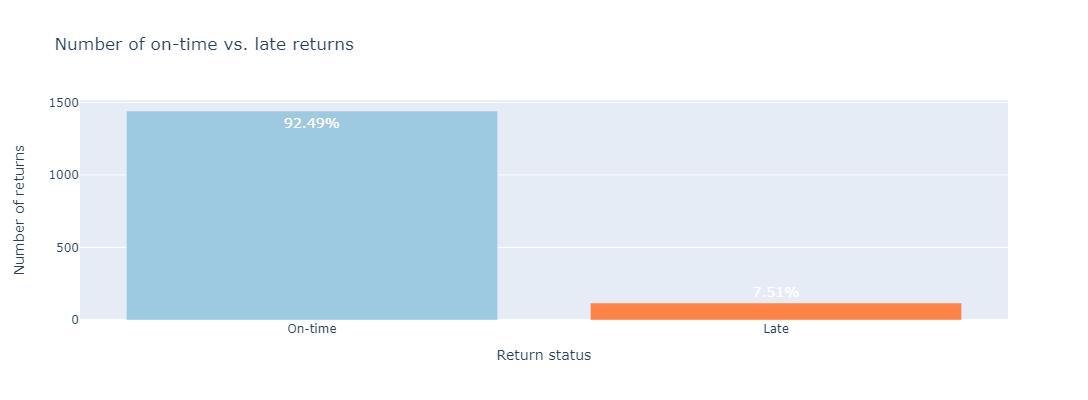

In [133]:
import plotly.graph_objects as go

# Calculate the number of on-time returns
on_time_returns = total_returns - late_returns

# Calculate the percentage of on-time returns
on_time_percent = round((on_time_returns / total_returns) * 100, 2)

# Calculate the percentage of late returns
late_percent = round((late_returns / total_returns) * 100, 2)

# Create a bar chart
fig = go.Figure(
    data=go.Bar(
        x=['On-time', 'Late'],
        y=[on_time_returns, late_returns],
        marker_color=['rgb(158,202,225)', 'rgb(255,130,71)'],
        text=[f'{on_time_percent}%', f'{late_percent}%'],
        textposition='auto',
        textfont=dict(color='white', size=14)
    )
)

# Update layout
fig.update_layout(
    title='Number of on-time vs. late returns',
    xaxis_title='Return status',
    yaxis_title='Number of returns',
    height=400, width=600,
)

# Show figure
fig.show()


* Based on the calculations, only 7.5% of the total number of returns are consifered late. In the beginning I was thinking that I should directly consider models that show a correlation between various socio-economic data and book characteristics, but based on this low percentage of late returns I will first consider basic data analysis. 

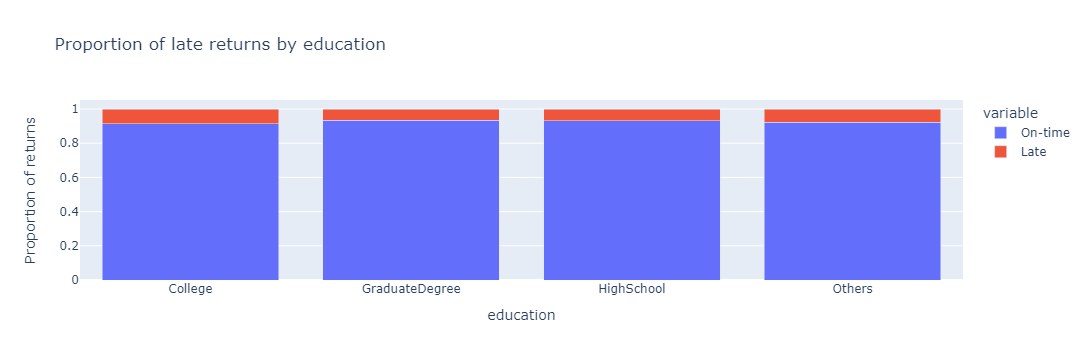

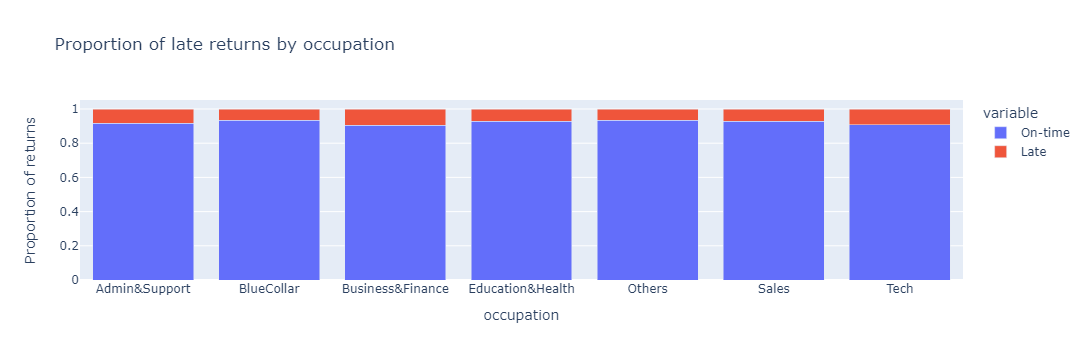

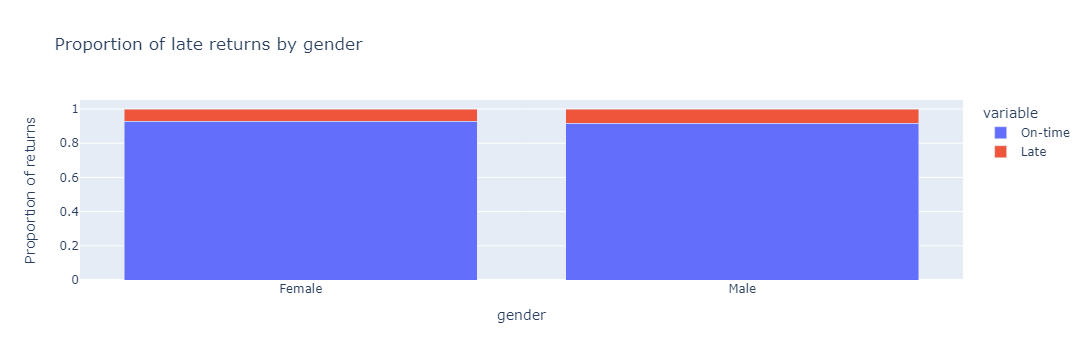

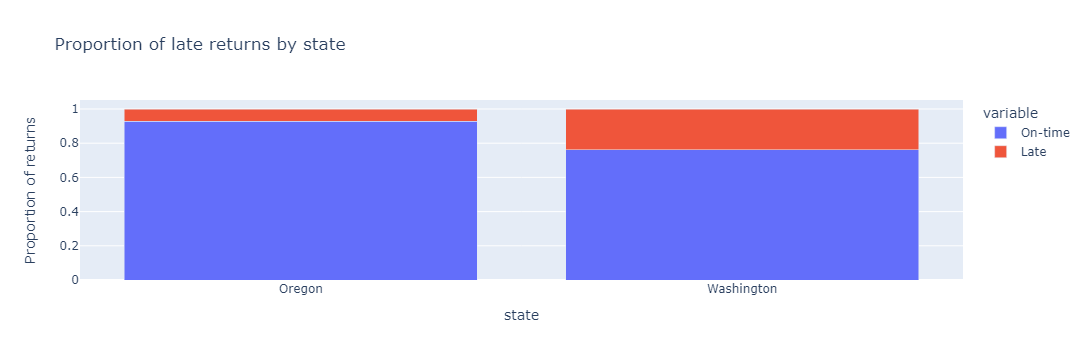

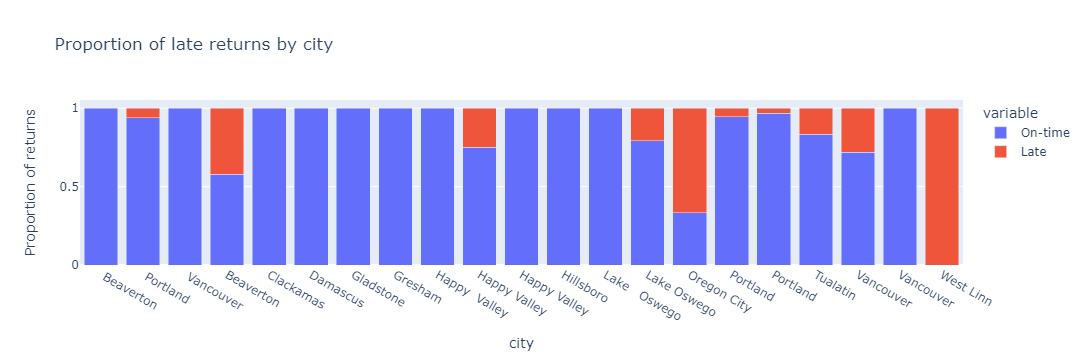

In [134]:
import plotly.express as px

def proportion_late_returns_by_column(df, column_name):
    column_counts = df.groupby(column_name)['late'].value_counts(normalize=True).unstack()
    
    # Rename the columns for clarity
    column_counts.columns = ['On-time', 'Late']
    
    # Create a stacked bar chart
    fig = px.bar(column_counts, x=column_counts.index, y=['On-time', 'Late'], 
                 barmode='stack', title=f'Proportion of late returns by {column_name}')
    
    # Set the x-axis and y-axis labels
    fig.update_layout(xaxis_title=column_name, yaxis_title='Proportion of returns')
    
    # Display the chart
    fig.show()
    
    
proportion_late_returns_by_column(df, 'education')
proportion_late_returns_by_column(df, 'occupation')
proportion_late_returns_by_column(df, 'gender')
proportion_late_returns_by_column(df, 'state')
proportion_late_returns_by_column(df, 'city')

Interesting ! So based on the analysis of late returns and their relation to the socio-economic characterstics of the customers we can conclude that there is no connection between the two. However, we can find some connection with the state where the person is based. It seems the people in Washington are recording more late returns, while people in cities like Oregon City and West Linn record high proportions of late return. 

* This observation makes me think that there could be a connection between late return and the distance between the location of the person and that of the library.

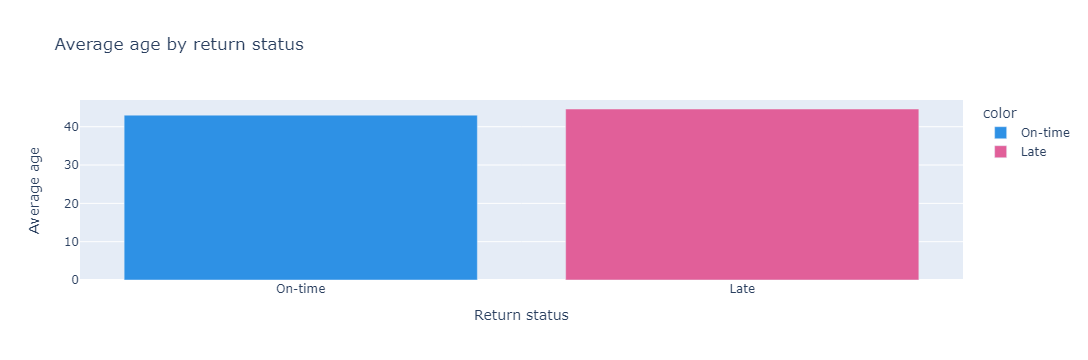

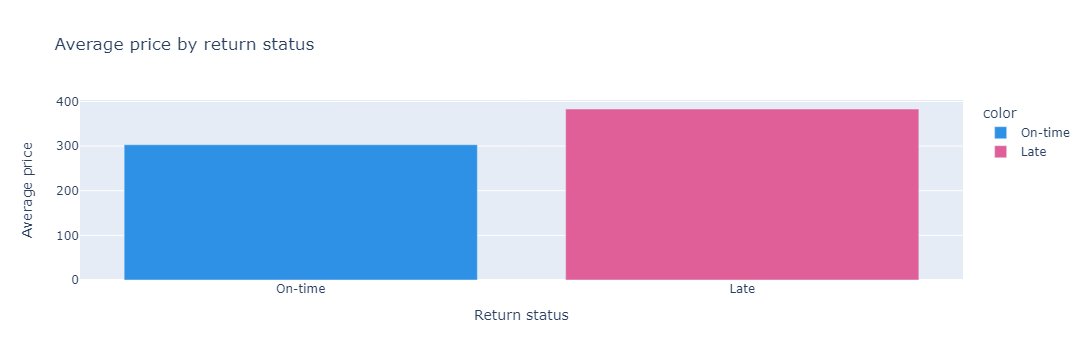

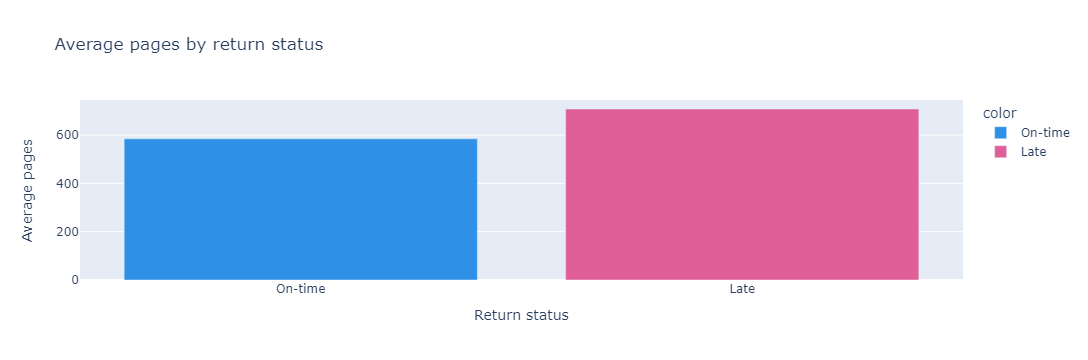

In [135]:
import plotly.express as px

def average_value_by_return_status(df, column_name):
    # Calculate mean value of variable for on-time and late returns
    on_time_mean = df[df['late'] == 0][column_name].mean()
    late_mean = df[df['late'] == 1][column_name].mean()
    
    # Define color scheme
    colors = px.colors.qualitative.Dark24
    
    # Create bar chart
    fig = px.bar(x=['On-time', 'Late'], y=[on_time_mean, late_mean],
                 title=f'Average {column_name} by return status', color=['On-time', 'Late'],
                 color_discrete_sequence=colors)
    
    # Set x-axis and y-axis labels
    fig.update_layout(xaxis_title='Return status', yaxis_title=f'Average {column_name}')
    
    # Display the chart
    fig.show()

average_value_by_return_status(df, 'age')
average_value_by_return_status(df, 'price')
average_value_by_return_status(df, 'pages')

We can notice in the graphs above that age has no impact in being on time or late with the book. We found out that the customer's age is on averge 40. Higher number of pages seem to influence the return rate of the book so its price. However let's not be confused by this, as most probably a longer book costs more and that's why somehow the higher price of the book positively influences the late return rate, not because the customer necessarily sees something valuable in the book. 
We can confirm this from the graph below: 

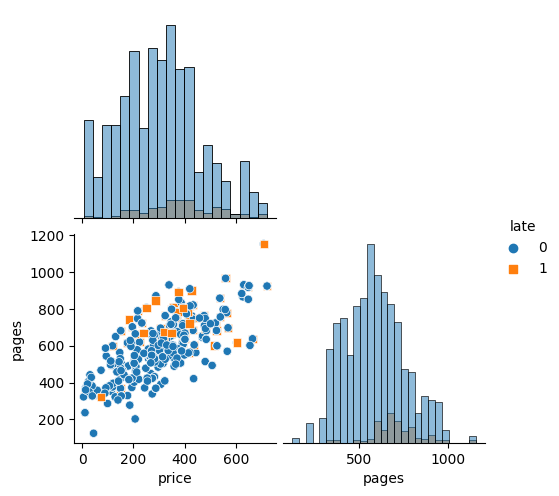

In [136]:
import seaborn as sns

# Select the columns we want to include in the plot
columns = ['price', 'pages', 'late']

# Create a pairplot with scatterplots on the diagonal and correlation coefficients in the upper triangle
sns.pairplot(df[columns], diag_kind='hist', hue='late', markers=['o', 's'], corner=True)

Based on what I managed to observe above, I want now to see of the distance between the customer's location and the library's location is influencing the late return rate. For this I will calculate the distance between the two zip codes and create a new column called "distance". For this I am going to use a Python library called pgeocode. Pgeocode is a Python library for querying of GPS coordinates, region name and municipality name from postal codes. 

More details here: https://pypi.org/project/pgeocode/

In [137]:
import pgeocode

df['zipcode'] = df['zipcode'].astype(str)
df['postal_code'] = df['postal_code'].astype(str)

def calculate_distance(df):
    distances = []
    nomi = pgeocode.Nominatim('us')
    for index, row in df.iterrows():
        borrower_zipcode = row['zipcode']
        library_zipcode = row['postal_code']
        borrower_location = nomi.query_postal_code([borrower_zipcode])
        library_location = nomi.query_postal_code(library_zipcode)
        if borrower_location is None or library_location is None:
            # Skip this row if either location is None
            continue
        distance = pgeocode.GeoDistance('us').query_postal_code(borrower_zipcode, library_zipcode)
        distances.append(distance)
    return distances

df['distance'] = calculate_distance(df)

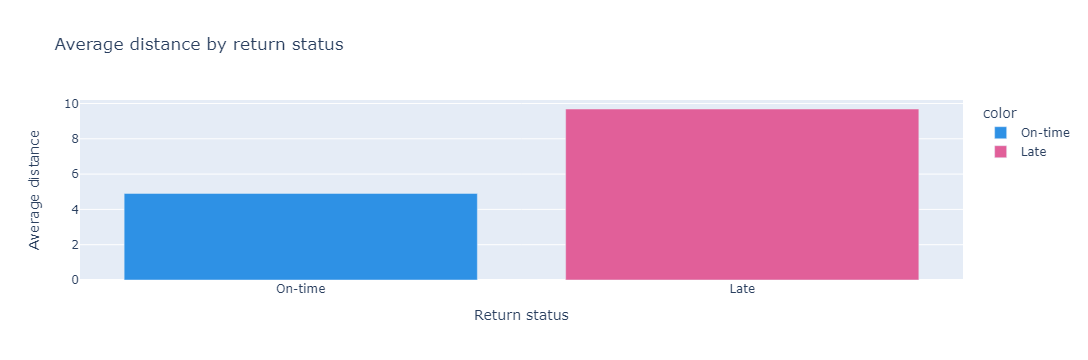

In [138]:
average_value_by_return_status(df, 'distance')

* It seems that my intuition was correct and the distance really affects the late return rate. Higher distances are associated with higher late return rates.

## Are there any factors you can find that are connected with late returns?

The answer is yes, we were able to identify two factors so far: The distance and the number of pages

## What would you recommend the library do to mitigate the risks you find? How would you present your findings to them to get buy-in?

Dear representatives of the library. Some time ago you contacted our company regarding a problem your library is facing, namely the late return of books.
The database you provided us contains both location data, characteristics of the books as well as socio-economic data about your customers.
First, I am going to present what is the percentage of late returns vs on time returns:

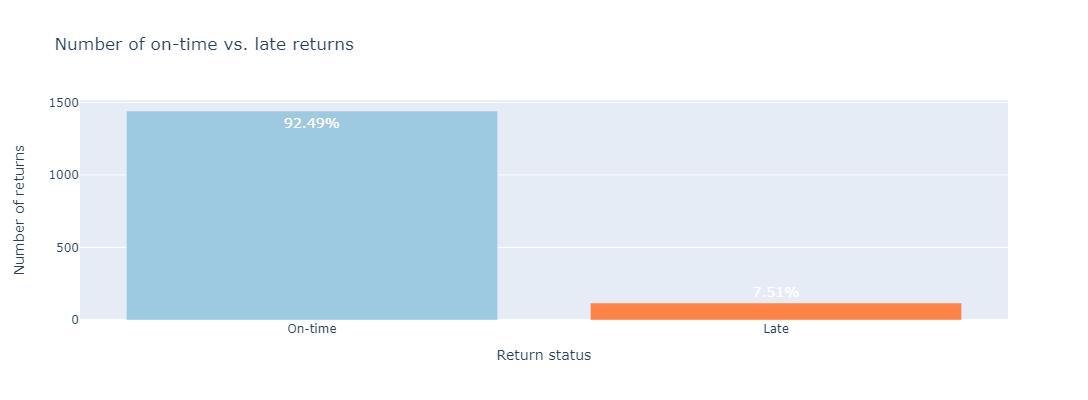

In [139]:
import plotly.graph_objects as go

# Calculate the number of on-time returns
on_time_returns = total_returns - late_returns

# Calculate the percentage of on-time returns
on_time_percent = round((on_time_returns / total_returns) * 100, 2)

# Calculate the percentage of late returns
late_percent = round((late_returns / total_returns) * 100, 2)

# Create a bar chart
fig = go.Figure(
    data=go.Bar(
        x=['On-time', 'Late'],
        y=[on_time_returns, late_returns],
        marker_color=['rgb(158,202,225)', 'rgb(255,130,71)'],
        text=[f'{on_time_percent}%', f'{late_percent}%'],
        textposition='auto',
        textfont=dict(color='white', size=14)
    )
)

# Update layout
fig.update_layout(
    title='Number of on-time vs. late returns',
    xaxis_title='Return status',
    yaxis_title='Number of returns',
    height=400, width=600,
)

# Show figure
fig.show()


- Based on the graph above, we can notice that only 7.51% of the library's customers recorded late returns

We analyzed the database and identified 2 main risks, as can be seen from the graphs below.
More specifically the size of the book, it seems that books with more pages can cause a delay in return. The other notable risk is the distance between the client's location and the library's. According to the graph, the greater the distance between the client's location and the library the higher the chance the library will have problems with late returns.


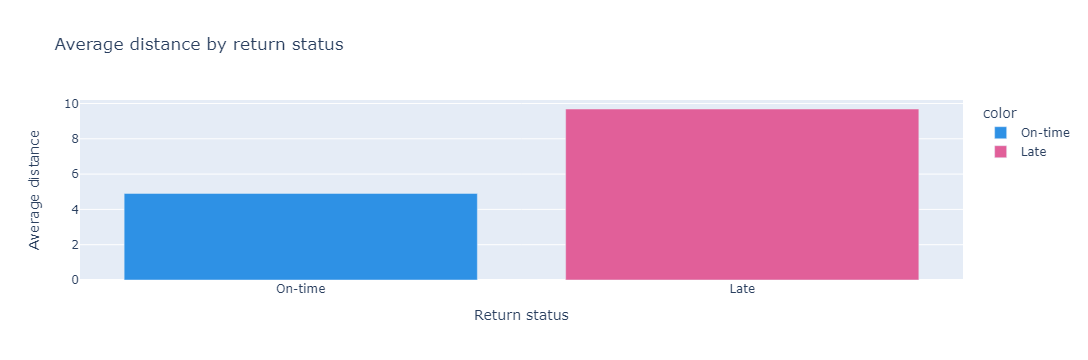

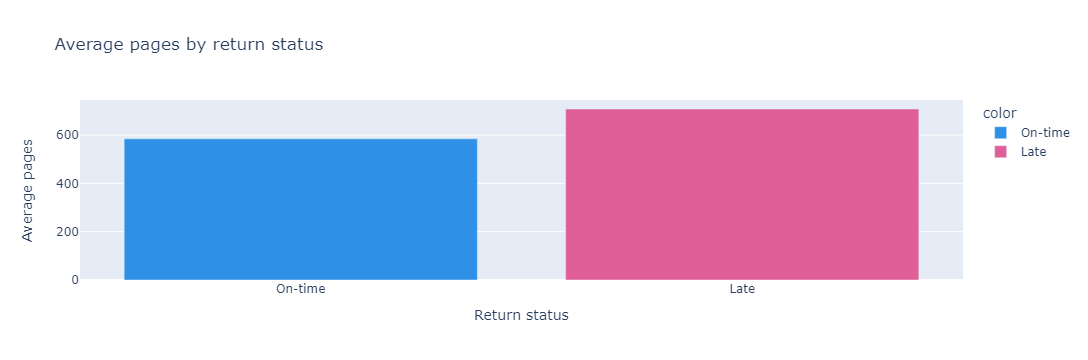

In [140]:
average_value_by_return_status(df, 'distance')
average_value_by_return_status(df, 'pages')

In order to solve the risks mentioned above we present the following long-term strategies:

#### 1) Accessing a courier service
- The fact that the distance increases the risk of the book being returned late can convey the fact that the person who borrowed the book is too busy or simply too lazy to go to the library. Sending a courier to pick up the book could improve the book return rate.
At the same time two other options can be added: A mail service or an easybox service. Therefore, the customer can use a collecting point which is closer to his home.

#### 2) Digitalization of books
- In the graph below you can see a positive relation between the price of a book and its number of pages (the thicker the book, the higher the price)
As I mentioned before a thicker book can cause delay in returning the book therefore the first advice I would give is to increase the number of books with pages over 400. Now, I understand that books are expensive and your budget is limited and that's why I recommend digitizing the books. The transition from physical format to electronic format and in different sub-formats such as epub, mobi or pdf represents a much greener and much cheaper alternative. Use to your advantage the fact that the younger generations have equipment such as laptops and kindles and can receive the book in electronic format.

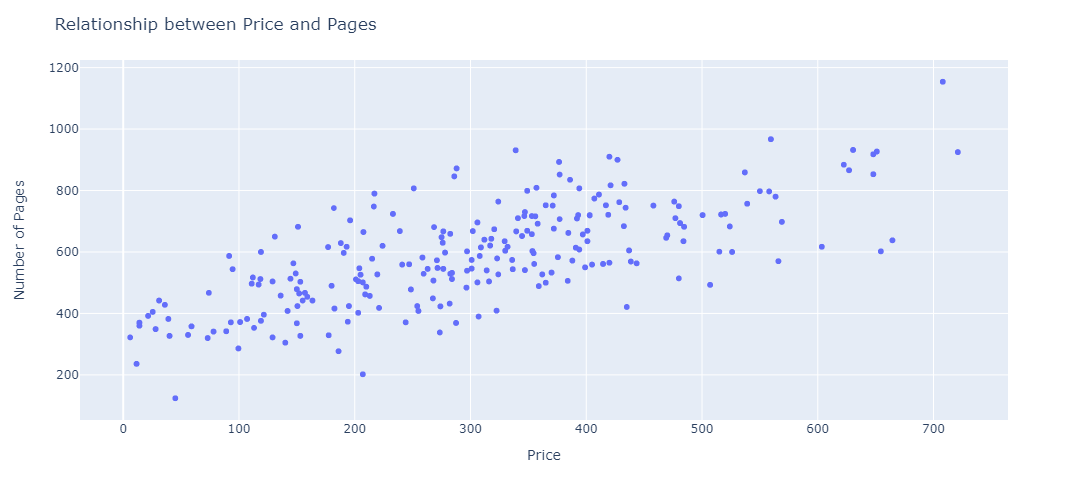

In [ ]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(df, x="price", y="pages", hover_name=df.index)

# Update layout
fig.update_layout(
    title="Relationship between Price and Pages",
    xaxis_title="Price",
    yaxis_title="Number of Pages",
    height=500,
    width=800
)

# Show figure
fig.show()

#### 2) Update the database
- I noticed that the customer's phone number and email address do not exist in the database.
Collecting them is necessary to send messages or emails to those who borrowed a book and for any reason did not bring it back in time. If the email or phone number cannot be collected, then a notification by mail can be used.

Bonus: I propose the creation of a bookmark to be given together with the borrowed book, with the following message "Knowledge is power, but power comes with responsibility for knowledge"

#### 3) Update the library infrastructure
- I recommend the creation of a digital infrastructure to be connected to the library's database. Thus, messages or emails will be sent automatically, a clearer record of the missing books will be kept, it will be possible to use graphics produced monthly that contain the stock of books, the delay rate, etc. Me and my team can help you here.

Bonus: I propose the creation of a personal rating. If the person who has a habit of borrowing books that he does not return, a fine should be applied that increases progressively depending on his reputation.

# Bonus

## Can you create a predictive model?

The short and simple answer is yes. However is one enough? If yes which one? I was thinking that there are several algorithms that fit a binary classification problem and I am not sure which one is the best for the database here, because it is quite hard to create a prediction with only 7% of late returns and few correlations with late returns. Therefore my approach is to build several models and evaluate each on of them based on metrics. In the end I will choose the best model out of the ones available. I was thinking about the following algorithms:

Logistic Regression: This is a common algorithm used for binary classification problems. Logistic regression models the probability of a certain outcome based on the input variables. It can handle continuous and categorical predictors.

Decision Trees: Decision trees are a simple but powerful algorithm used for both classification and regression problems. They are easy to interpret and can handle a mixture of continuous and categorical predictors.

Random Forest: Random forests are an ensemble of decision trees. They are designed to reduce overfitting and increase the accuracy of the model. They can handle a mixture of continuous and categorical predictors.

Gradient Boosting: Gradient boosting is another ensemble method that can be used for both classification and regression problems. It works by combining several weak models to create a stronger one. It can handle a mixture of continuous and categorical predictors.

Support Vector Machines (SVMs): SVMs are another popular algorithm used for binary classification problems. They work by finding the hyperplane that best separates the classes in the input space. They can handle continuous and categorical predictors.

In [52]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

def evaluate_algorithm(algo_name, X, y, test_size):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Choose the algorithm
    if algo_name == 'Logistic Regression':
        model = LogisticRegression()
    elif algo_name == 'Random Forest':
        model = RandomForestClassifier()
    elif algo_name == 'Gradient Boosting':
        model = GradientBoostingClassifier()
    elif algo_name == 'SVM':
        model = SVC(probability=True)
    elif algo_name == 'Decision Tree':
        model = DecisionTreeClassifier()
    else:
        raise ValueError("Algorithm not supported. Choose from: Logistic Regression, Random Forest, Gradient Boosting, SVM, Decision Tree.")
    
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the evaluation metrics in a dictionary
    metrics = {'Accuracy': accuracy,
               'Precision': precision,
               'Recall': recall,
               'F1 score': f1}

    return metrics

In [56]:
# Call the function for Random Forest algorithm
metrics1 = evaluate_algorithm('Logistic Regression', df[['distance', 'pages']], df['late'], 0.2)
metrics2 = evaluate_algorithm('Random Forest', df[['distance', 'pages']], df['late'], 0.2)
metrics3 = evaluate_algorithm('Gradient Boosting', df[['distance', 'pages']], df['late'], 0.2)
metrics4 = evaluate_algorithm('SVM', df[['distance', 'pages']], df['late'], 0.2)
metrics5 = evaluate_algorithm('Decision Tree', df[['distance', 'pages']], df['late'], 0.2)

# Print the evaluation metrics
print(metrics)
print(metrics2)
print(metrics3)
print(metrics4)
print(metrics5)

{'Accuracy': 0.9391025641025641, 'Precision': 0.4375, 'Recall': 0.4117647058823529, 'F1 score': 0.42424242424242425}
{'Accuracy': 0.9358974358974359, 'Precision': 0.4, 'Recall': 0.35294117647058826, 'F1 score': 0.37500000000000006}
{'Accuracy': 0.9519230769230769, 'Precision': 0.5833333333333334, 'Recall': 0.4117647058823529, 'F1 score': 0.4827586206896552}
{'Accuracy': 0.9455128205128205, 'Precision': 0.0, 'Recall': 0.0, 'F1 score': 0.0}
{'Accuracy': 0.9134615384615384, 'Precision': 0.2916666666666667, 'Recall': 0.4117647058823529, 'F1 score': 0.34146341463414637}


c:\users\sebi-pc\desktop\project python\project3\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Out of all algortithms tested Logistic Regression and Gradient Boosting recorded the best metrics. Gradient Boosting delivered the best results.

The metrics provide a way to evaluate how well the Gradient Boosting algorithm performed in predicting whether a book would be late or not. Here is a brief explanation of each of the metrics:

Accuracy: The proportion of correct predictions made by the model. In this case, the Gradient Boosting algorithm achieved an accuracy of 0.95, meaning it correctly predicted whether book would be late or not in 95% of cases.

Precision: The proportion of true positives (books predicted to be late that were actually late) out of all books predicted to be late. In this case, the Gradient Boosting algorithm achieved a precision of 0.58, meaning that out of all books predicted to be late, 58% of them were actually late.

Recall: The proportion of true positives out of all actual positive (all books that were actually late). In this case, the Gradient Boosting algorithm achieved a recall of 0.41, meaning that out of all books that were actually late, 41% of them were correctly identified as late by the algorithm.

F1 score: The harmonic mean of precision and recall. This metric provides an overall measure of a model's performance by balancing both precision and recall. In this case, the Gradient Boosting algorithm achieved an F1 score of 0.48, which is a reasonable balance between precision and recall.

## Do something fun or creative with your analysis!

I always found wordclouds nice and interactive, and I was thinking to create one with the most borrowed titles.

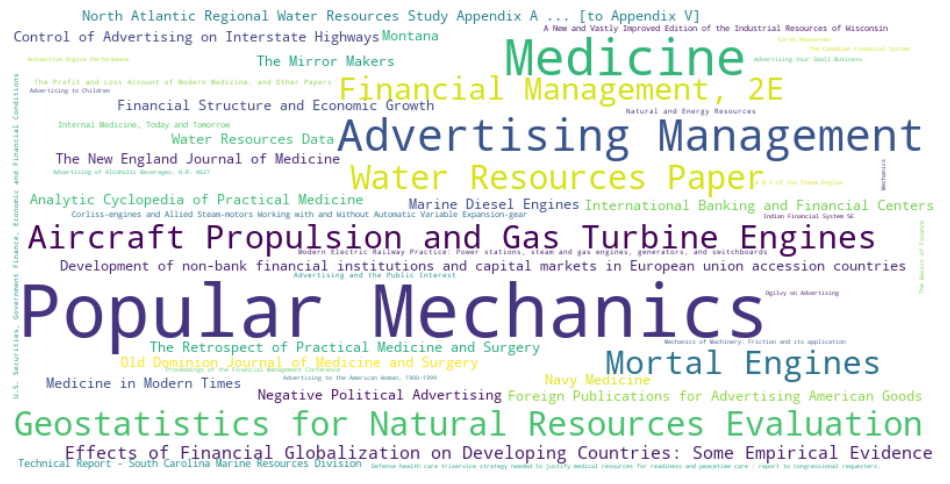

In [66]:
#Creating a wordcloud with the most borrowed book titles.

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Step 2: Aggregate borrowing data to obtain the number of times each book has been borrowed
book_counts = df['title'].value_counts()

# Step 3: Sort books by number of times borrowed, and select top N
N = 50 # Number of books to include in word cloud
top_books = book_counts[:N]

# Step 4: Generate word cloud visualization of book titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_books)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## What other stories can you tell with this data?

Other stories we can tell with available data are:
From which library were the most books borrowed and how many of them are returned on time or late.

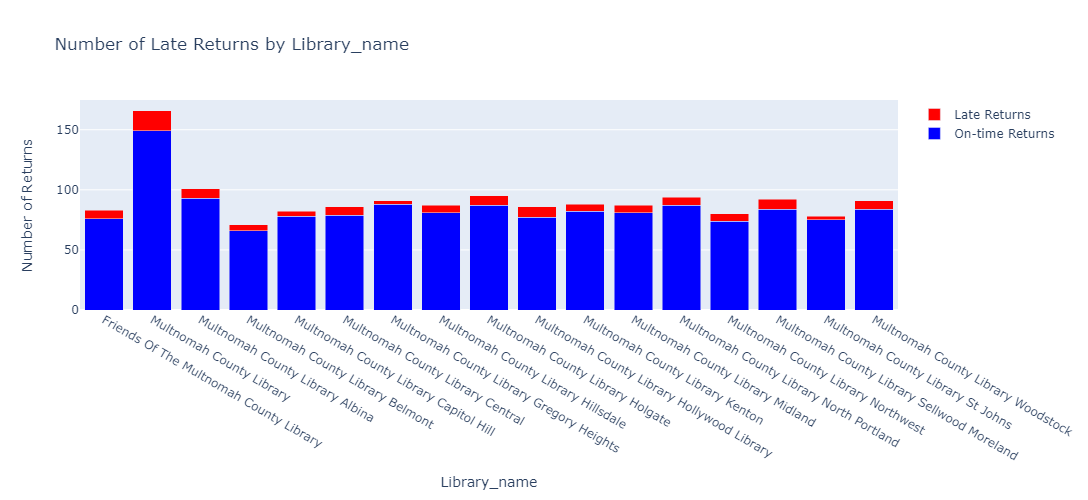

In [81]:
import pandas as pd
import plotly.graph_objs as go


def plot_count_by_group(df, column_name, index_col_name):

    # Create pivot table of True values by index column
    true_vals = pd.pivot_table(df[df[column_name] == True], values=column_name, index=index_col_name, aggfunc='count')

    # Create pivot table of False values by index column
    false_vals = pd.pivot_table(df[df[column_name] == False], values=column_name, index=index_col_name, aggfunc='count')

    # Merge the two pivot tables together
    counts = false_vals.join(true_vals, lsuffix='_late', rsuffix='_on-time', how='outer').fillna(0)

    # Create bar chart
    fig = go.Figure()
    fig.add_trace(go.Bar(x=counts.index, y=counts['late_late'], name='On-time Returns', marker_color='blue'))
    fig.add_trace(go.Bar(x=counts.index, y=counts['late_on-time'], name='Late Returns', marker_color='red'))
    # fig.add_trace(go.Bar(x=counts.index, y=counts['late_late'], name='On-time Returns', marker_color='blue'))

    # Update layout
    fig.update_layout(
        title='Number of Late Returns by ' + index_col_name.capitalize(),
        xaxis_title=index_col_name.capitalize(),
        yaxis_title='Number of Returns',
        barmode='stack',
        height=500,
        width=800
    )

    # Show figure
    fig.show()
    
plot_count_by_group(df, 'late', 'library_name')  

We can see that the most books were borrowed from the central branch and it also has the most overdue books

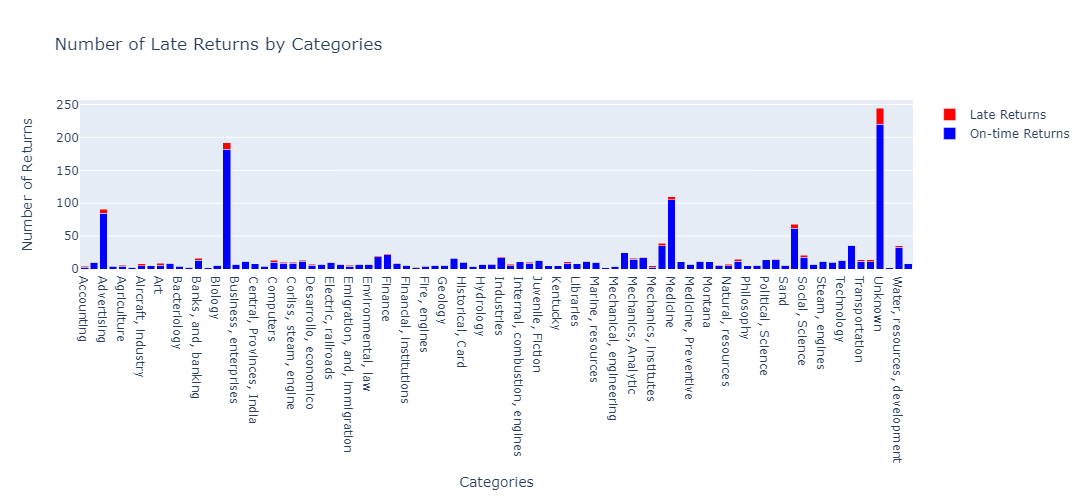

In [82]:
plot_count_by_group(df, 'late', 'categories')

What are the most popular book categories?
The top 3 represent: Business and Economics, Advertising and Medicine

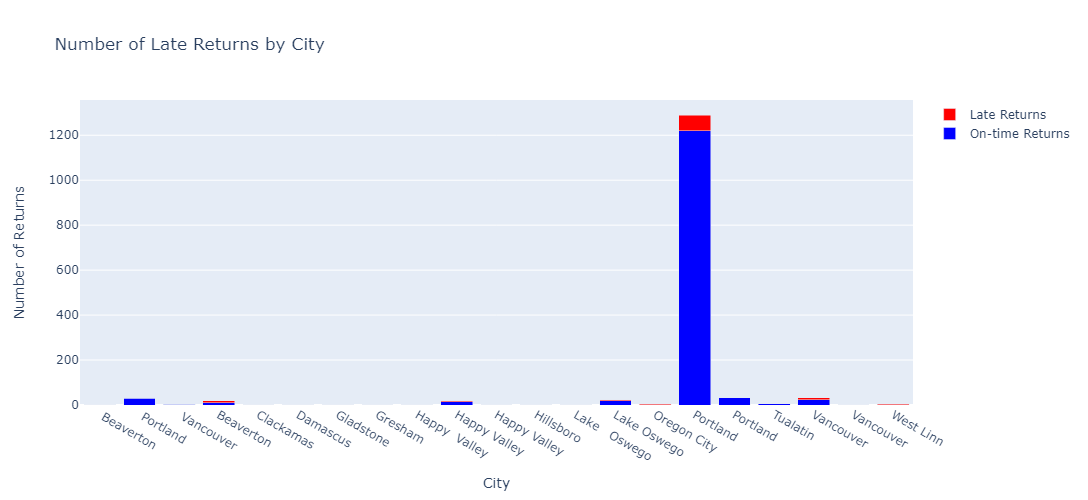

In [92]:
plot_count_by_group(df, 'late', 'city')

From which city are the people who borrowed books? It seems most of people who borrowed books are from Portland, Oregon.

What is the thickest book in the library?

In [86]:
thickest_book_index = df['pages'].idxmax()
thickest_book_title = df.loc[thickest_book_index, 'title']
print(f"The thickest book in the library is '{thickest_book_title}', with {df.loc[thickest_book_index, 'pages']} pages.")

The thickest book in the library is 'Directory of Japanese Technical Resources in the United States', with 1154 pages.


What is the oldest book published?

In [91]:
# Convert publishedDate to datetime
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

# Find index of oldest book
oldest_book_index = df['publishedDate'].idxmin()

# Get title and publication date of oldest book
oldest_book_title = df.loc[oldest_book_index, 'title']
oldest_book_publishedDate = df.loc[oldest_book_index, 'publishedDate']

# Print result
print(f"The oldest published book in the library is '{oldest_book_title}', published on {oldest_book_publishedDate.date()}.")

The oldest published book in the library is 'Mechanics' Magazine', published on 1830-01-01.


### The End